In [2]:
import pandas as pd


In [ ]:
df_2019 = pd.read_parquet("dati/2019/tratte_disp_2019.parquet")
df_2020 = pd.read_parquet("dati/2020/tratte_disp_2020.parquet")
df_2021 = pd.read_parquet("dati/2021/tratte_disp_2021.parquet")
df_2022 = pd.read_parquet("dati/2022/tratte_disp_2022.parquet")

In [ ]:
def flatten_coords(coords):
    flattened = []
    for coord in coords:
        flattened.extend(coord)  # Flatten each tuple (x, y, z)
    return flattened
def geometry_to_columns(geometry):
    lines = [list(line.coords) for line in wkb.loads(geometry).geoms]  # Extract coordinates
    flattened = [coord for line in lines for coord in line]           # Flatten to single list
    return flattened
import geopandas as gpd
from shapely import wkb
df2_2019 = pd.read_parquet("dati/2022/tratte_gas_2022.parquet")
df2_expended = df2_2019['geometry'].apply(geometry_to_columns).apply(flatten_coords).apply(pd.Series)
#gdf_2019 = gpd.GeoDataFrame(df2_2019, geometry='geometry')

In [ ]:
df2_expended
lenght = gdf_2019.iloc[1]['geometry'].length
gdf_2019.iloc[6]['geometry'].geoms[0]

In [ ]:
coordinates = [list(line.coords) for line in gdf_2019['geometry'][0].geoms]

In [ ]:
type(df2_2019['geometry'])

In [ ]:
df2_2019 = pd.read_parquet("dati/2022/tratte_gas_2022.parquet")
from shapely.geometry.linestring import LineString
for i in df2_2019['geometry'].values:
    line:LineString = wkb.loads(i).geoms[0]
    #print(f"area: {line.area}")                #NOT USEFULL
    #print(line.length)                         #USEFULL
    #print(line.is_closed)                      #USEFULL
    #print(line.is_simple)                      #USEFULL
    #print(line.is_ring)                        #USEFULL
    #print(line.minimum_clearance)              #USEFULL
    #print(line.has_z)                          #NOT USEFULL
    #print(line.is_valid)                       #NOT USEFULL
    #print(line.centroid.x)                       #MAYBE USEFULL
    #for b in line.boundary
    #print(line.boundary)                       #MAYBE USEFULL
    #print(line.bounds[3])                         #MAYBE USEFULL
    #print(len(line.coords.xy))
    #print(line.convex_hull)
    #print(line.envelope)
    #print(line.oriented_envelope)
    #print(line.minimum_rotated_rectangle)
    print(line.xy[0][1])
    # 


In [258]:
print(f"columns 2019 {list(pd.read_parquet('dati/2019/idsap_rischio_2019/part-00000-tid-1172828717447291518-526b776f-6349-4a73-9ac0-7e49355b8703-63-1-c000.snappy.parquet').columns)}")
# print(f"columns 2020 {list(pd.read_parquet('dati/2020/tratte_disp_2020.parquet').columns)}")
# print(f"columns 2021 {list(pd.read_parquet('dati/2021/tratte_disp_2021.parquet').columns)}")
# print(f"columns 2022 {list(pd.read_parquet('dati/2022/tratte_disp_2022.parquet').columns)}")

columns 2019 ['data', 'idsap', 'risk_level']


In [257]:
print(f"columns 2019 {list(pd.read_parquet('dati/2019/tratte_disp_2019.parquet').columns)}")
print(f"columns 2020 {list(pd.read_parquet('dati/2020/tratte_disp_2020.parquet').columns)}")
print(f"columns 2021 {list(pd.read_parquet('dati/2021/tratte_disp_2021.parquet').columns)}")
print(f"columns 2022 {list(pd.read_parquet('dati/2022/tratte_disp_2022.parquet').columns)}")

columns 2019 ['ODL', 'DATA', 'IDSAP']
columns 2020 ['ODL', 'DATA', 'IDSAP']
columns 2021 ['ODL', 'DATA', 'IDSAP']
columns 2022 ['ODL', 'DATA', 'IDSAP']


In [249]:
print(f"columns 2019 {list(pd.read_parquet('dati/2019/tratte_gas_2019.parquet').columns)}")
print(f"columns 2020 {list(pd.read_parquet('dati/2020/tratte_gas_2020.parquet').columns)}")
print(f"columns 2021 {list(pd.read_parquet('dati/2021/tratte_gas_2021.parquet').columns)}")
print(f"columns 2022 {list(pd.read_parquet('dati/2022/tratte_gas_2022.parquet').columns)}")


columns 2019 ['IDSAP', 'TIPORETE', 'MATERIALE', 'DIAMETRO', 'ANNOPOSA', 'CODSISTEMA', 'geometry']
columns 2020 ['OBJECTID', 'TIPO', 'IDSAP', 'MATERIALE', 'DIAMETRO', 'ANNO_POSA', 'CODSISTEMA', 'geometry']
columns 2021 ['TIPO', 'IDSAP', 'MATERIALE', 'DIAMETRO', 'ANNO_POSA', 'CODSISTEMA', 'geometry']
columns 2022 ['TIPO', 'IDSAP', 'MATERIALE', 'DIAMETRO', 'ANNO_POSA', 'CODSISTEMA', 'geometry']


In [253]:
from collections import defaultdict
df2_2019 = pd.read_parquet("dati/2019/tratte_gas_2019.parquet")

# Create a defaultdict with list as default factory
def expand_geometry(dataframe:pd.DataFrame, geometry_column='geometry') -> pd.DataFrame:
    data = defaultdict(list)
    for geometry_bytes in dataframe[geometry_column].values:
        linestring:LineString = wkb.loads(geometry_bytes).geoms[0]
        data["lenght"].append(linestring.length)
        data["is_closed"].append(linestring.is_closed)
        data["is_simple"].append(linestring.is_simple)
        data["is_ring"].append(linestring.is_ring)
        data["minimum_clearance"].append(linestring.minimum_clearance)
        data["centroid_x"].append(linestring.centroid.x)
        data["centroid_y"].append(linestring.centroid.y)
        data['bound_0'].append(linestring.bounds[0])
        data['bound_1'].append(linestring.bounds[1])
        data['bound_2'].append(linestring.bounds[2])
        data['bound_3'].append(linestring.bounds[3])
        data['x_coordinates'].append(list(linestring.xy[0]))
        data['y_coordinates'].append(list(linestring.xy[1]))
    new_dataframe = dataframe.copy()
    new_dataframe = new_dataframe.drop(columns=[geometry_column], inplace=False)

    #mantain consistency
    if "OBJECTID" in new_dataframe.columns:
        new_dataframe = new_dataframe.drop(columns=["OBJECTID"], inplace=False)

    if "TIPORETE" in new_dataframe.columns:
        new_dataframe = new_dataframe.rename(columns={'TIPORETE': 'TIPO'})

    if 'ANNOPOSA' in new_dataframe.columns:
        new_dataframe = new_dataframe.rename(columns={'ANNOPOSA': 'ANNO_POSA'})
    
    for col, values in dict(data).items():
        new_dataframe[col] = values
    return new_dataframe

In [254]:
d = expand_geometry(df2_2019)

In [255]:
d.to_parquet('here.parquet')

In [9]:
df = pd.read_parquet("./dati/2019/tratte_gas_2019_processed.parquet")

<Axes: >

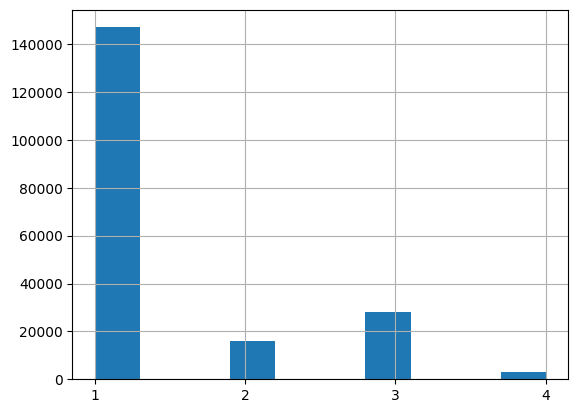

In [10]:
df['MATERIALE'].hist()

<Axes: >

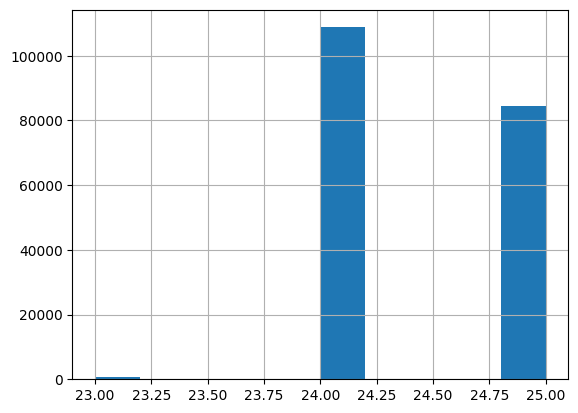

In [12]:
df['TIPO'].hist()